# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd

---
## 2. Load data

In [77]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [35]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


In [36]:
sample = df[df['id'] == '24011ae4ebbe3035111d65fa7c15bc57']

In [97]:
df[['date_renewal', 'churn']].describe()

,date_renewal,churn
count,14606,14606.000000
mean,2015-07-21 06:59:00.353279488,0.097152
min,2013-06-26 00:00:00,0.000000
25%,2015-04-17 00:00:00,0.000000
50%,2015-07-27 00:00:00,0.000000
75%,2015-10-29 00:00:00,0.000000
max,2016-01-28 00:00:00,1.000000
std,NaN,0.296175


In [70]:
df[['date_end', 'churn']]

,date_end,churn
0,2016-06-15,1
1,2016-08-30,0
2,2016-04-16,0
3,2016-03-30,0
4,2016-03-07,0
...,...,...
14601,2016-05-08,0
14602,2016-08-27,1
14603,2016-02-07,1
14604,2016-08-30,0


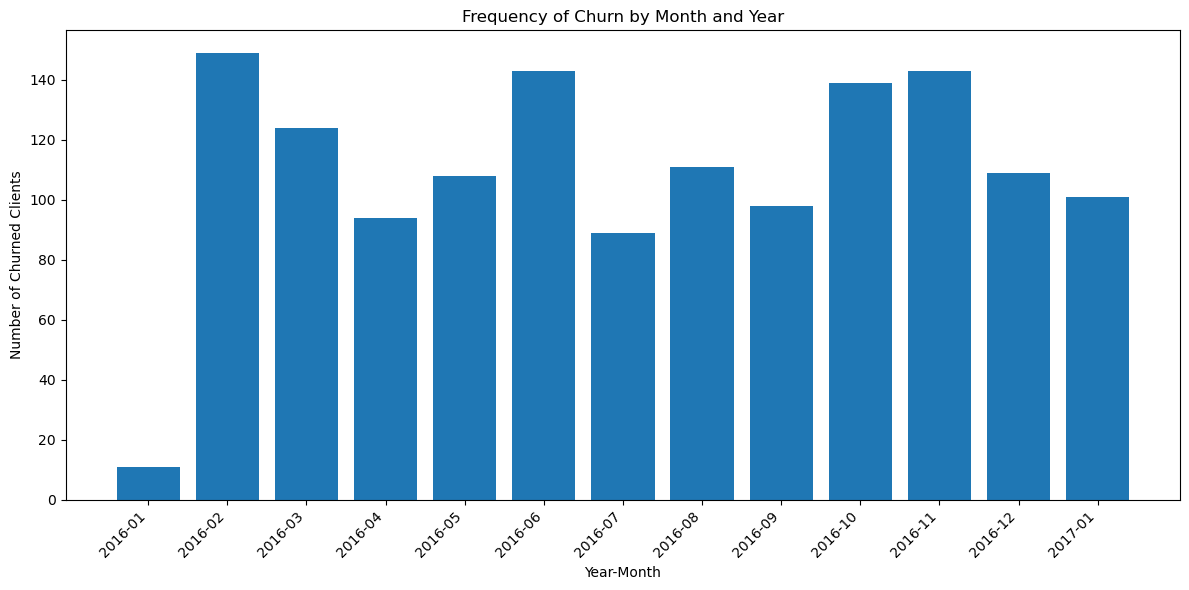

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and date_end is in datetime format
# If not, convert date_end to datetime
df['date_end'] = pd.to_datetime(df['date_end'])

# Filter for churned clients (churn == 1)
churn_df = df[df['churn'] == 1][['date_end', 'churn']]

# Extract year and month from date_end
churn_df['year'] = churn_df['date_end'].dt.year
churn_df['month'] = churn_df['date_end'].dt.month

# Group by year and month to count churn occurrences
churn_counts = churn_df.groupby(['year', 'month']).size().reset_index(name='churn_count')

# Create a year-month label for plotting
churn_counts['year_month'] = churn_counts['year'].astype(str) + '-' + churn_counts['month'].astype(str).str.zfill(2)

# Plot the frequency histogram (bar plot)
plt.figure(figsize=(12, 6))
plt.bar(churn_counts['year_month'], churn_counts['churn_count'], color='#1f77b4')
plt.xlabel('Year-Month')
plt.ylabel('Number of Churned Clients')
plt.title('Frequency of Churn by Month and Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [76]:
churn_df.sort_values(by=['year', month'])

,date_end,churn,year,month
714,2016-01-28,1,2016,1
2691,2016-01-30,1,2016,1
3153,2016-01-30,1,2016,1
3223,2016-01-28,1,2016,1
6486,2016-01-28,1,2016,1
...,...,...,...,...
14238,2017-01-10,1,2017,1
14239,2017-01-18,1,2017,1
14508,2017-01-03,1,2017,1
14517,2017-01-05,1,2017,1


In [94]:
df[['date_renewal', 'churn']].describe()

,date_renewal,churn
count,14606,14606.000000
mean,2015-07-21 06:59:00.353279488,0.097152
min,2013-06-26 00:00:00,0.000000
25%,2015-04-17 00:00:00,0.000000
50%,2015-07-27 00:00:00,0.000000
75%,2015-10-29 00:00:00,0.000000
max,2016-01-28 00:00:00,1.000000
std,NaN,0.296175


In [93]:
df_2017 = df.loc[(df['date_end'].dt.year == 2016) & (df['date_end'].dt.month == 1) & (df['date_end'].dt.day == 28), ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'churn']]

#  

In [91]:
df_2017

,date_activ,date_end,date_modif_prod,date_renewal,churn
62,2010-01-28,2016-01-28,2010-01-28,2015-01-30,0
324,2013-01-28,2016-01-28,2013-01-28,2015-01-30,0
714,2013-01-28,2016-01-28,2015-11-16,2015-02-09,1
878,2010-01-28,2016-01-28,2010-01-28,2015-01-30,0
889,2013-01-28,2016-01-28,2015-11-18,2015-02-09,0
1397,2013-01-28,2016-01-28,2013-01-28,2015-01-30,0
1544,2010-01-28,2016-01-28,2010-01-28,2015-02-09,0
1638,2011-05-11,2016-01-28,2014-01-28,2015-02-09,0
2089,2013-01-28,2016-01-28,2013-01-28,2015-01-30,0
3223,2013-01-28,2016-01-28,2013-01-28,2015-01-30,1


In [8]:
df.loc[df['date_modif_prod'] > df['date_renewal'], ['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'churn']]

,id,date_activ,date_end,date_modif_prod,date_renewal,churn
0,24011ae4ebbe3035111d65fa7c15bc57,2013-06-15,2016-06-15,2015-11-01,2015-06-23,1
23,5789c446141a44a9b405db35682f6eb5,2013-02-27,2016-02-27,2015-12-16,2015-03-09,0
31,4bffd9d74bfb770ef7763e8e4e88dfc3,2011-12-14,2016-08-06,2015-08-06,2015-01-05,0
41,757ea31873662fe77d60e8c4f736a1ec,2012-03-01,2016-09-20,2015-09-20,2014-03-03,0
81,1d4a665170914d996d3fb78069495516,2012-10-24,2016-11-18,2015-11-18,2015-10-25,1
...,...,...,...,...,...,...
14513,2722f0c341a5e18fc99a965bab8350f5,2010-02-04,2016-02-04,2015-12-15,2015-02-05,0
14526,70b59ab2a63cb4c5b8263b3a4b4107ba,2011-10-24,2016-05-19,2015-05-26,2014-12-19,0
14564,f49226b26ac8ff0003e734e13371247f,2013-06-21,2016-06-21,2015-11-01,2015-06-22,0
14595,a6096551a64c47cd240c356b0669f892,2010-02-08,2016-02-08,2015-12-16,2015-02-09,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [9]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [10]:
price_df[price_df['id'] == '038af19179925da21a25619c5a24b745']

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0,0.0,44.266930,0.0,0.0
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.0,0.0,44.444710,0.0,0.0
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.0,0.0,44.444710,0.0,0.0
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.0,0.0,44.444710,0.0,0.0
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.0,0.0,44.444710,0.0,0.0


In [11]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as you can!

In [12]:
client_df = df

In [13]:
client_df = pd.merge(client_df, diff, on='id', how='left')

In [14]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_peak_var': 'mean', 'price_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_peak_var': 'dec_1', 'price_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['peak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_peak_var']
diff['peak_diff_dec_january_power'] = diff['dec_2'] - diff['price_peak_fix']
diff = diff[['id', 'peak_diff_dec_january_energy','peak_diff_dec_january_power']]
diff.head()

,id,peak_diff_dec_january_energy,peak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.002302,0.097749
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,-0.005120,0.097749
4,00114d74e963e47177db89bc70108537,0.000000,0.000000


In [15]:
client_df = pd.merge(client_df, diff, on='id', how='left')

In [16]:
# New Feature 1: Tenure (in years)
client_df['tenure'] = (client_df['date_end'] - client_df['date_activ']).dt.days / 365.25

In [17]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,peak_diff_dec_january_energy,peak_diff_dec_january_power,tenure
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961,-0.017912,-24.339581,3.000684
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779,0.000000,0.000000,7.025325
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779,0.000528,0.000000,6.001369
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779,0.000000,0.000000,6.001369
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916,-0.002302,0.097749,6.146475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.008653,0.177779,0.000000,0.000000,3.956194
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.000299,0.014948,5.684001e-03,2.987132e-04,1,-0.007395,0.236694,-0.003727,0.145963,4.000000
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.000000,0.000011,2.896760e-06,4.860000e-10,1,-0.006192,0.162916,-0.002302,0.097749,3.997262
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779,0.000000,0.000000,4.000000


In [18]:
# New Feature 2: Time since last product modification (in years)
# Using the latest date_end as the reference point
client_df['time_since_modif'] = (client_df['date_end'] - client_df['date_modif_prod']).dt.days / 365.25

In [20]:
# New Feature 6: Consumption trend (last month vs. yearly average)
client_df['avg_monthly_cons'] = client_df['cons_12m'] / 12
client_df['cons_trend'] = client_df['cons_last_month'] - client_df['avg_monthly_cons']

In [21]:
# New Feature 7: Total consumption (electricity + gas)
client_df['total_cons_12m'] = client_df['cons_12m'] + client_df['cons_gas_12m']

In [22]:
# New Feature 10: Price volatility (standard deviation)
price_volatility = price_df.groupby('id').agg({
    'price_off_peak_var': 'std',
    'price_peak_var': 'std',
    'price_mid_peak_var': 'std',
    'price_off_peak_fix': 'std',
    'price_peak_fix': 'std',
    'price_mid_peak_fix': 'std'
}).reset_index()
price_volatility.columns = ['id', 'std_price_off_peak_var', 'std_price_peak_var', 'std_price_mid_peak_var',
                            'std_price_off_peak_fix', 'std_price_peak_fix', 'std_price_mid_peak_fix']
client_df = pd.merge(client_df, price_volatility, on='id', how='left')

In [23]:
# New Feature 11: Has discount (binary)
client_df['has_discount'] = (client_df['forecast_discount_energy'] > 0).astype(int)

In [24]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,avg_monthly_cons,cons_trend,total_cons_12m,std_price_off_peak_var,std_price_peak_var,std_price_mid_peak_var,std_price_off_peak_fix,std_price_peak_fix,std_price_mid_peak_fix,has_discount
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000000,0.000000,54946,0.007829,0.005126,0.020983,1.050136e+00,7.039226,4.692817,0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,388.333333,-388.333333,4660,0.002212,0.024677,0.000000,8.040385e-02,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,45.333333,-45.333333,544,0.002396,0.000506,0.000000,8.753223e-02,0.000000,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,132.000000,-132.000000,1584,0.002317,0.000000,0.000000,8.040349e-02,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,368.750000,157.250000,4425,0.003847,0.001885,0.001588,7.368135e-02,0.044209,0.029473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,2689.166667,-2689.166667,80210,0.003897,0.000000,0.000000,9.154352e-02,0.000000,0.000000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,601.916667,-420.916667,7223,0.003669,0.001863,0.000128,1.165389e-01,0.071868,0.016479,0
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,153.666667,25.333333,1844,0.003976,0.001989,0.001368,6.341481e-02,0.038049,0.025366,0
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,10.916667,-10.916667,131,0.002212,0.024677,0.000000,8.040379e-02,0.000000,0.000000,0


### convert categorical data to dummies

### Normalize the numerical values